# Final Project: Web Scraping Wikipedia

### Author: <font color='red'>Justin Bester</font>

In [1]:
# download & parse the page
import urllib
url = "https://en.wikipedia.org/wiki/List_of_state_highways_in_North_Carolina"
from bs4 import BeautifulSoup
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

# get the table
table = soup.find("table",class_="routelist-top")
#print(table.prettify())

# uncomment to print each cell
for row in table.find_all("tr"):
    cols = row.find_all("td")
    heads = row.find_all("th")
    #print(len(heads))
    for cell in heads:
        nop=0
        #print(cell)
    #print(len(cols))
    for cell in cols:
        nop=0
        #print(cell)

#heads[0] = route number
#cols[0] = length in miles
#cols[1] = length in km
#cols[2] = S/W terminus
#cols[3] = N/E terminus
#cols[4] = formed
#cols[5] = removed
#cols[6] = notes

# We will process current NC State Routes only
# We will get the route number, length in mi & km, & year of formation

numbers = []
lengths_mi = []
lengths_km = []
years = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    heads = row.find_all("th")
    if len(cells) == 7 and len(heads) == 1:
        if cells[5].text.lower().strip() == "current":
            numbers.append(heads[0].find("a").text.split()[-1])  # .split()[-1] converts NC x to x.
            lengths_mi.append(cells[0].text.strip())
            lengths_km.append(cells[1].text.strip())
            years.append(cells[4].text[1:5])  # The way this is formatted, text comes out like 0YYYY-01-01YYYY

#import into dataframe
import pandas as pd
df = pd.DataFrame([])
df["Route Number"]=numbers
df["Length in Miles"]=lengths_mi
df["Length in Kilometers"]=lengths_km
df["Year of Formation"]=years

# Save the DataFrame (df) to a CSV file named 'CSC221-webscrape-data.csv' using Panda's to_csv() function

# INSERT THE 1 LINE OF CODE REQUIRED TO SAVE THE DATAFRAME TO CSV FILE
df.to_csv("CSC221-webscrape-data.csv")

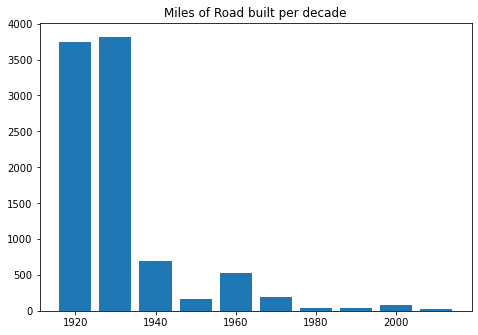

In [25]:
import re
import matplotlib.pyplot as plt

col_list = ["Route Number", "Length in Miles", "Length in Kilometers", "Year of Formation"]
df = pd.read_csv("CSC221-webscrape-data.csv", usecols=col_list)

def fix_year(input):
    return "01/01/{}".format(input)

def remove_brackets(s):
    return re.sub(r'\[.*?\]', '', s)

#Data Cleanup
df["Length in Miles"] = df["Length in Miles"].apply(remove_brackets)
df['Length in Miles'] = df['Length in Miles'].astype(float)
df["Year of Formation"] = df["Year of Formation"].apply(fix_year)
df["Year of Formation"] = pd.to_datetime(df['Year of Formation'])


df = df[["Year of Formation","Length in Miles","Length in Kilometers"]].groupby((df["Year of Formation"].dt.year//10)*10).sum()


fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.bar(list(df.index.values), list(df["Length in Miles"].values), width=8)
ax.set_title('Miles of Road built per decade')
plt.show()